In [1]:
import pandas as pd #csv파일 로드
import numpy as np #행렬연산 
import matplotlib.pyplot as plt #데이터 시각화
from keras.models import Sequential #딥러닝 모델 작성
from keras.layers import LSTM, Dropout, Dense, Activation
# from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau
import datetime

In [11]:
data = pd.read_csv('C:/Users/mwh51/Desktop/AI/GOOG.csv') #csv파일 로드
data.head() #맨앞 5개가 나온다

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-03,774.250000,776.065002,769.500000,772.559998,772.559998,1278800
1,2016-10-04,776.030029,778.710022,772.890015,776.429993,776.429993,1201400
2,2016-10-05,779.309998,782.070007,775.650024,776.469971,776.469971,1461200
3,2016-10-06,779.000000,780.479980,775.539978,776.859985,776.859985,1070700
4,2016-10-07,779.659973,779.659973,770.750000,775.080017,775.080017,933200


In [12]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2
#최대, 최소가격을 통해 평균가격을 만들어준다


20
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20, 20)            1760      
_________________________________________________________________
lstm_9 (LSTM)                (None, 64)                21760     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
99/99 [==============================] - 3s 10ms/step - loss: 0.0012
Epoch 2/20
99/99 [==============================] - 1s 11ms/step - loss: 6.2802e-04
Epoch 3/20
99/99 [==============================] - 1s 10ms/step - loss: 4.4781e-04
Epoch 4/20
99/99 [==============================] - 1s 10ms/step - loss: 3.8219e-04
Epoch 5/20
99/99 [===========================

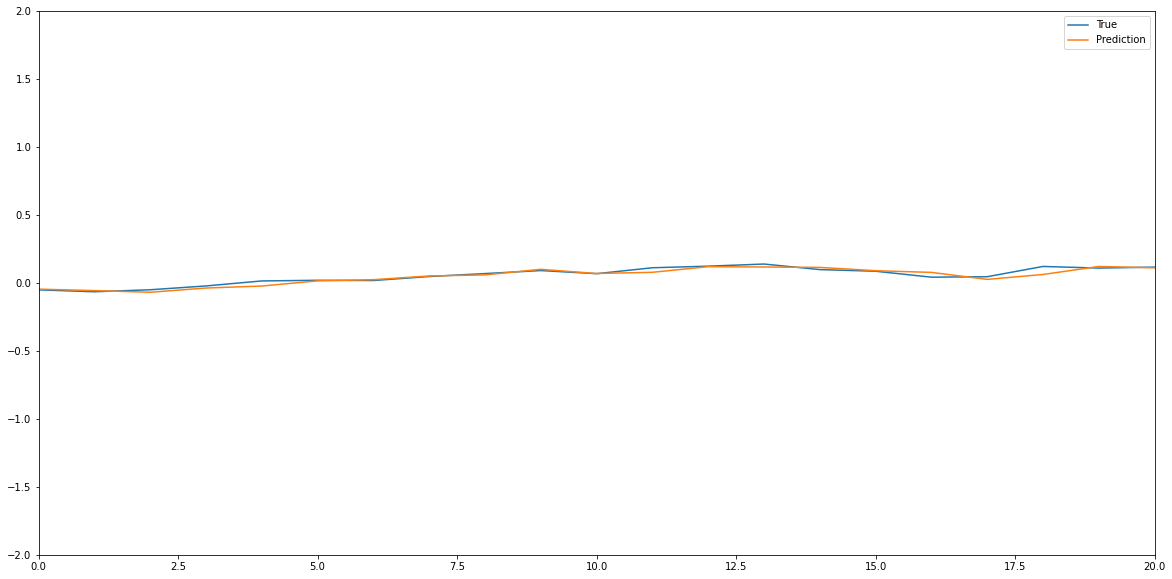

[0.00032683106866171854]
30
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_10 (LSTM)               (None, 30, 30)            3840      
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                24320     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 28,225
Trainable params: 28,225
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
99/99 [==============================] - 4s 15ms/step - loss: 0.0010
Epoch 2/20
99/99 [==============================] - 1s 14ms/step - loss: 6.0013e-04
Epoch 3/20
99/99 [==============================] - 1s 12ms/step - loss: 4.5084e-04
Epoch 4/20
99/99 [==============================] - 1s 12ms/step - loss: 3.7573e-04
Epoch 5/20
99/99 [==

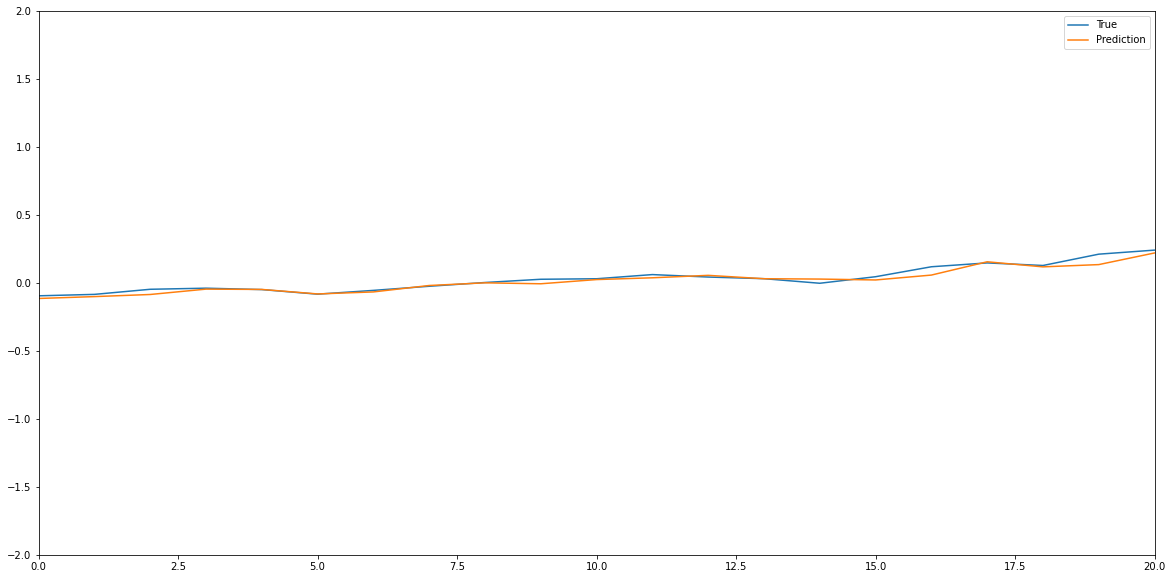

[0.00032683106866171854, 0.00038969269069090044]


In [13]:
loss = []
window_size = [20, 30, 40, 50, 60, 70, 80, 90, 100]
for i in window_size:
    a = []
    print(i)
    seq_len = i #윈도우사이즈(주식종목에따라 달라진다)
    sequence_length = seq_len + 1 #50개를 통해 그 다음값을 예측(51개)

    result = []


    for index in range(len(mid_prices) - sequence_length):
        result.append(mid_prices[index: index + sequence_length])

        
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        #normalized_window = [((float(p) - float(np.mean(window))) / np.std(window)) for p in window] #Z-Score Normalization (Z-점수 정규화)
        #normalized_window = [p for p in window] #비정규화
        #normalized_window = [((float(p) - float(min(window))) / (max(window) - min(window))) for p in window] #Min-Max Normalization (최소-최대 정규화)
        normalized_data.append(normalized_window)
        #데이터 정규화, 맨처음값을 0으로하고 나머지를 비율에 맞게 정규화

        
    result = np.array(normalized_data)

    # split train and test data
    # 트레이닝 데이터(90%)
    row = int(round(result.shape[0] * 0.8))   # 0 % ~ 80 % train data, 80 % ~ 90 % validation data, 90 % ~ 100 % test data
    train = result[:row, :]
    #######################################
    test = result[int(round(result.shape[0] * 0.9)):result.shape[0], :]
    x_test = test[:, :-1] # window 개
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_test = test[:, -1] #1개
    #######################################
    
    #np.random.shuffle(train) #배열값을 랜덤으로 섞는다

    x_train = train[:, :-1] # window 개
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    y_train = train[:, -1] #1개

    x_valid = result[int(round(result.shape[0] * 0.8)):int(round(result.shape[0] * 0.9)), :-1] # window 개
    x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
    y_valid = result[int(round(result.shape[0] * 0.8)):int(round(result.shape[0] * 0.9)), -1] #1개

    # x_train.shape, x_valid.shape
    
    model = Sequential() #모델을 순차적으로 정의하는 클래스

    model.add(LSTM(i, return_sequences=True, input_shape=(i, 1)))

    model.add(LSTM(64, return_sequences=False))

    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='rmsprop')

    model.summary()
    
    model.fit(x_train, y_train,
    batch_size=10,
    epochs=20)
    
    pred = model.predict(x_valid) #예측(파랑:실제데이터, 주황:예측데이터)

    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.plot(y_valid, label='True')
    ax.plot(pred, label='Prediction')
    plt.axis([0, 20, -2, 2])
    ax.legend()
    plt.show()
    
    for b in range(len(pred)):
        a.append((y_valid[b] - pred[b][0])**2)
        
    
    avg = np.mean(a)
    loss.append(avg)
    print(loss)

In [14]:
optimize_window_size = window_size[loss.index(np.min(loss))]
print("최적화된 윈도우사이즈는 ", optimize_window_size, "입니다.")

최적화된 윈도우사이즈는  20 입니다.


20
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20, 20)            1760      
_________________________________________________________________
lstm_13 (LSTM)               (None, 64)                21760     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 23,585
Trainable params: 23,585
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
99/99 [==============================] - 3s 9ms/step - loss: 0.0016
Epoch 2/20
99/99 [==============================] - 1s 8ms/step - loss: 6.3871e-04
Epoch 3/20
99/99 [==============================] - 1s 8ms/step - loss: 4.5802e-04
Epoch 4/20
99/99 [==============================] - 1s 9ms/step - loss: 3.6699e-04
Epoch 5/20
99/99 [==============================]

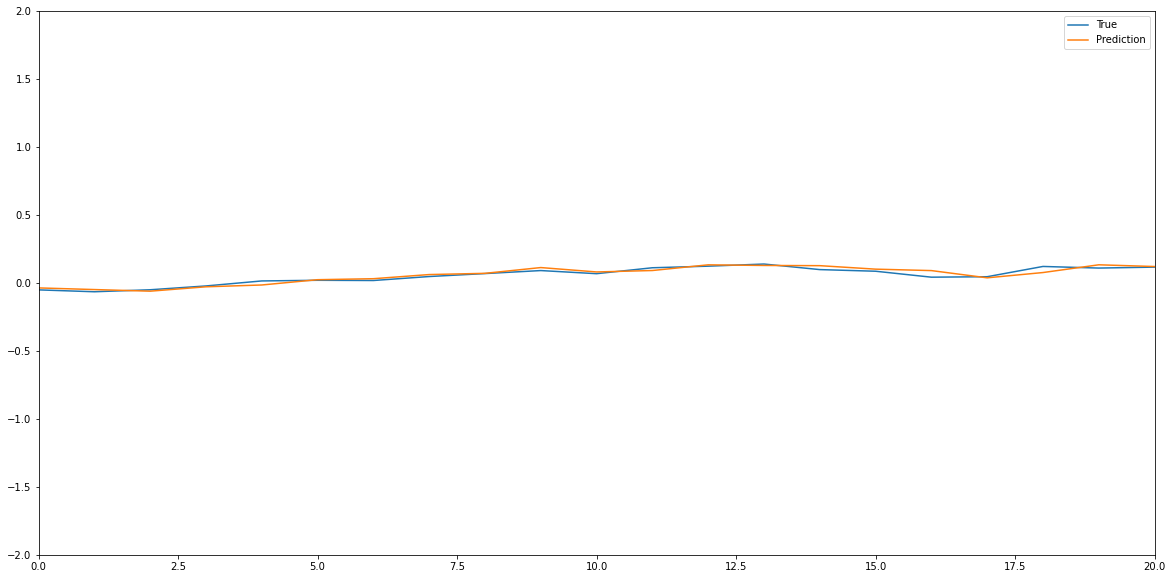

[0.0003422710954995656]


In [15]:
loss = []
window_size = [optimize_window_size]
for i in window_size:
    a = []
    print(i)
    seq_len = i #윈도우사이즈(주식종목에따라 달라진다)
    sequence_length = seq_len + 1 #50개를 통해 그 다음값을 예측(51개)

    result = []


    for index in range(len(mid_prices) - sequence_length):
        result.append(mid_prices[index: index + sequence_length])

        
    normalized_data = []
    for window in result:
        normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
        #normalized_window = [((float(p) - float(np.mean(window))) / np.std(window)) for p in window] #Z-Score Normalization (Z-점수 정규화)
        #normalized_window = [p for p in window] #비정규화
        #normalized_window = [((float(p) - float(min(window))) / (max(window) - min(window))) for p in window] #Min-Max Normalization (최소-최대 정규화)
        normalized_data.append(normalized_window)
        #데이터 정규화, 맨처음값을 0으로하고 나머지를 비율에 맞게 정규화

        
    result = np.array(normalized_data)

    # split train and test data
    #트레이닝 데이터(90%)
    row = int(round(result.shape[0] * 0.8))   # 0 % ~ 80 % train data, 80 % ~ 90 % validation data, 90 % ~ 100 % test data
    train = result[:row, :]
    #######################################
    test = result[int(round(result.shape[0] * 0.9)):result.shape[0], :]
    x_test = test[:, :-1] # window 개
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
    y_test = test[:, -1] #1개
    #######################################
    
    #np.random.shuffle(train) #배열값을 랜덤으로 섞는다

    x_train = train[:, :-1] # window 개
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    y_train = train[:, -1] #1개

    x_valid = result[int(round(result.shape[0] * 0.8)):int(round(result.shape[0] * 0.9)), :-1] # window 개
    x_valid = np.reshape(x_valid, (x_valid.shape[0], x_valid.shape[1], 1))
    y_valid = result[int(round(result.shape[0] * 0.8)):int(round(result.shape[0] * 0.9)), -1] #1개

    # x_train.shape, x_valid.shape
    
    model = Sequential() #모델을 순차적으로 정의하는 클래스

    model.add(LSTM(i, return_sequences=True, input_shape=(i, 1)))

    model.add(LSTM(64, return_sequences=False))

    model.add(Dense(1, activation='linear'))

    model.compile(loss='mse', optimizer='rmsprop')

    model.summary()
    
    model.fit(x_train, y_train,
    batch_size=10,
    epochs=20)
    
    pred = model.predict(x_valid) #예측(파랑:실제데이터, 주황:예측데이터)

    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    ax.plot(y_valid, label='True')
    ax.plot(pred, label='Prediction')
    plt.axis([0, 20, -2, 2])
    ax.legend()
    plt.show()
    
    for b in range(len(pred)):
        a.append((y_valid[b] - pred[b][0])**2)
        
    
    avg = np.mean(a)
    loss.append(avg)
    print(loss)

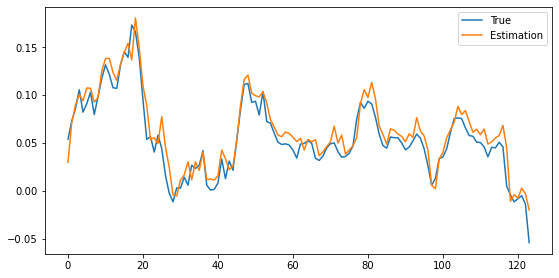

[0.0046222745615578376, -0.0022604999341853116, -0.007583561362440094, -0.0024889236648747426, -0.004598245354206831, -0.0033873110963971165, -0.011436358500389265, -0.01585767751525735, -0.011874334618201754, -0.011171828349064161, -0.008496207295118463, -0.019851294571909817, -0.05041060877049608, -0.03906839588448441, -0.03447136647931581, -0.02659165548103337, -0.025200146349695474, -0.027790428359005137, -0.05422046378955647, -0.06678703034553035, -0.059907686]
내일 예측주가는  2736.510034793839 입니다.


In [16]:
window_size = [optimize_window_size]
estimated = model.predict(x_test) #예측(파랑:실제데이터, 주황:예측데이터)
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(222)
ax.plot(y_test, label='True')
ax.plot(estimated, label='Estimation')
#plt.axis([0, 20, -2, 2])
ax.legend()
plt.show()

n_result = [(p/window[0])-1 for p in mid_prices[-optimize_window_size:]]
n_result = [[p] for p in n_result]

b = []
for i in range(len(x_test)):
    b.append(n_result)
    
b = np.array(b)

pred = model.predict(b)

n_result = []
for i in range(len(b[0])):
    n_result.append(b[0][i][0])
   
n_result.append(pred[0][0])
print(n_result)

x = (n_result[-1] + 1)*window[0]
print("내일 예측주가는 ", x, "입니다.")